# 1. 資料匯入

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
pd.set_option("display.max_columns",10) #設定pandas最多顯示出10個欄位資訊
df = pd.read_csv("StudentsPerformance.csv",encoding = "big5") #1000筆
df.head()
# 資料來源：https://www.kaggle.com/spscientist/students-performance-in-exams¶

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 2.預處理

In [194]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
writing score,0,0.0
reading score,0,0.0
math score,0,0.0
test preparation course,0,0.0
lunch,0,0.0
parental level of education,0,0.0
race/ethnicity,0,0.0
gender,0,0.0


# 3.簡單統計各個欄位資訊

In [211]:
col=["gender", "race/ethnicity","parental level of education", "lunch", "test preparation course"]
for item in col:
    print(item.upper(),":")
    print(df[item].value_counts(),"\n") 

GENDER :
female    518
male      482
Name: gender, dtype: int64 

RACE/ETHNICITY :
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64 

PARENTAL LEVEL OF EDUCATION :
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64 

LUNCH :
standard        645
free/reduced    355
Name: lunch, dtype: int64 

TEST PREPARATION COURSE :
none         642
completed    358
Name: test preparation course, dtype: int64 



# 4.數值轉換

In [196]:
#判斷數學成績、閱讀成績、寫作成績是否有及格，並且統計
passing = 60
df['math_status'] = np.where(df['math score']<passing,"Fail","Pass")
print("Maths Status\n",df['math_status'].value_counts())
df['reading_status'] = np.where(df['reading score']<passing,"Fail","Pass")
print("reading status\n",df['reading_status'].value_counts())
df['writing_status'] = np.where(df['writing score']<passing,"Fail","Pass")
print("writing status\n",df['writing_status'].value_counts())

Maths Status
 Pass    677
Fail    323
Name: math_status, dtype: int64
reading status
 Pass    746
Fail    254
Name: reading_status, dtype: int64
writing status
 Pass    719
Fail    281
Name: writing_status, dtype: int64


# 5.分析

### 5.1父母親學歷對成績的影響

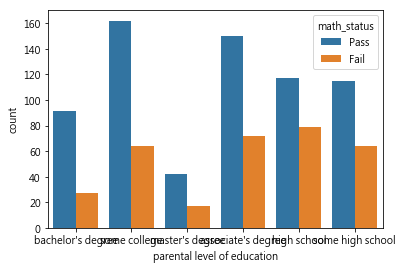

In [197]:
#數學成績
sns.countplot(x='parental level of education', data = df, hue=df['math_status'])
plt.show()

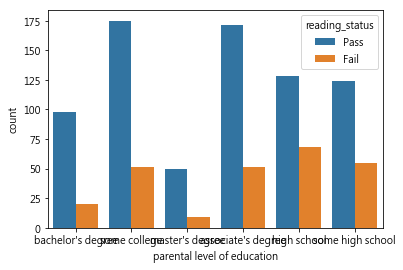

In [198]:
#閱讀成績
sns.countplot(x='parental level of education', data = df, hue=df['reading_status'])
plt.show()

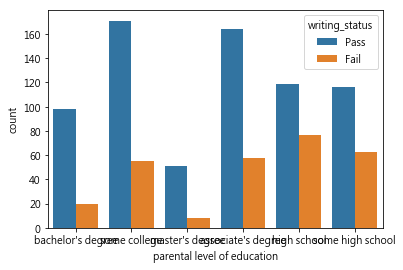

In [199]:
#寫作成績
sns.countplot(x='parental level of education', data = df, hue=df['writing_status'])
plt.show()

### 5.2考前有無準備對成績的影響

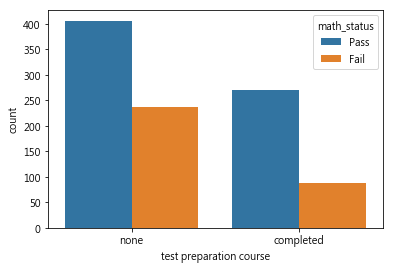

In [200]:
#數學成績
sns.countplot(x='test preparation course', data = df, hue=df['math_status'])
plt.show()

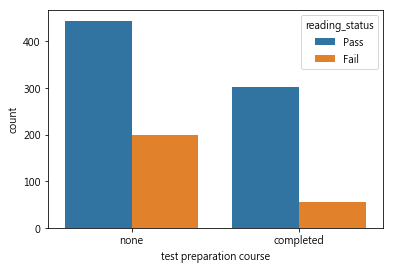

In [201]:
#閱讀成績
sns.countplot(x='test preparation course', data = df, hue=df['reading_status'])
plt.show()

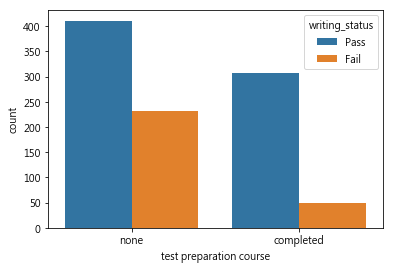

In [202]:
#寫作成績
sns.countplot(x='test preparation course', data = df, hue=df['writing_status'])
plt.show()

# 6. 單一分類器

In [203]:
#事先準備 X 和 y 的值
X = df[['math score', 'writing score', 'reading score']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df[['gender']]

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### 6.1 單純貝式分析

In [205]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(metrics.classification_report(y_test, gnb.predict(X_test)))

             precision    recall  f1-score   support

     female       0.76      0.67      0.71       109
       male       0.65      0.75      0.70        91

avg / total       0.71      0.70      0.71       200



C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 6.2 Decision tree

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier(criterion='gini',max_depth=5)
tree.fit(X_train, y_train)
print(metrics.classification_report(y_test, tree.predict(X_test)))

             precision    recall  f1-score   support

     female       0.86      0.86      0.86       109
       male       0.84      0.84      0.84        91

avg / total       0.85      0.85      0.85       200



### 6.3 LogisticRegression

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(metrics.classification_report(y_test, lr.predict(X_test)))

             precision    recall  f1-score   support

     female       0.93      0.83      0.88       109
       male       0.82      0.92      0.87        91

avg / total       0.88      0.88      0.88       200



C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 6.4 KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print(metrics.classification_report(y_test, knn.predict(X_test)))

             precision    recall  f1-score   support

     female       0.84      0.93      0.88       109
       male       0.90      0.79      0.84        91

avg / total       0.87      0.86      0.86       200



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


### 6.5 SVC

In [209]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf")
svc.fit(X_train, y_train)
print(metrics.classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

     female       0.92      0.88      0.90       109
       male       0.86      0.91      0.89        91

avg / total       0.90      0.90      0.90       200



C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
